----

#TPN°2: Análisis Exploratorio y Curación de Datos

##Mentoría 10: ¿Cómo vivimos las y los argentinos? Relación entre hábitos de vida, alimentación y prevalencia de las principales enfermedades no transmisibles.

###Integrantes:
* Antonel, Maximiliano
* Caullo, María Laura
* Juárez, Victor Manuel
* Gomez, Camila

---

In [1]:
! git clone https://github.com/MarianaPereyra45/EPH.git

Cloning into 'EPH'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 18 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 28.42 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
from os import path
import pandas as pd
import locale
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Seleccionamos variables de interés

In [3]:
interesting_cols = [ "cod_provincia", "region", "cant_componentes", "bhih01", "quintil_uc", "nivel_instruccion_j", "cobertura_salud_j", "bhch03", "bhch04",
                    "nivel_instruccion_agrupado", "cobertura_salud", "condicion_actividad", "biaf01", "biaf02_m", "biaf03", "biaf04_m", "biaf05", "biaf06_m", "biaf07_m",
                     "nivel_actividad_fisica","bita04","consumo_tabaco_100", "hta_nofumadores", "biha04", "biha05_01", "biha05_02", "bipc01", "bipc03", "imc", "imc_categorias", "bial01",
                     "bial02", "bial03", "bial04","bial05", "bial06", "bial07", "bial08", "promedio_fv_diario", "bico03","bico05_01","bico05_02", "bica02", "bica03_01",
                     "bica03_02", "consumo_regular_riesgo", "consumo_episodico_excesivo", "bidi01", "bidi02", "bidi04_02", "bidi04_03", "bidi05", "bidi06_01",
                      "bidi06_02", "bidi08", "control_diabetes", "promedio_sistolica", "promedio_diastolica", "ta_elevada", "bima07", "bima10", "imc_bima", "imc_categorias_bima",
                      "bimq05", "glucemia_elevada", "findrisc", "colesterol_elevado", "bidi03", "biha03", "bimq06"]

df = pd.read_excel('/content/EPH/ENFR2018.xlsx', usecols=interesting_cols)


In [4]:
df[:3]

,cod_provincia,region,cant_componentes,bhih01,quintil_uc,nivel_instruccion_j,cobertura_salud_j,bhch03,bhch04,nivel_instruccion_agrupado,...,ta_elevada,bima07,bima10,imc_bima,imc_categorias_bima,bimq05,glucemia_elevada,findrisc,bimq06,colesterol_elevado
0,2,1,2,50000,5,7,1,1,32,3,...,1.0,181.0,106.0,3236.0,3.0,NaN,NaN,2.0,NaN,NaN
1,2,1,3,40000,5,7,1,2,65,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,40000,5,7,1,2,33,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Procedemos a analizar los datos faltantes de las variables a grandes rasgos.

In [5]:
total_personas = len(df.cod_provincia)
valores_faltantes = (((df.isnull().sum())/total_personas)*100).map('{:.2f}%'.format)
print(valores_faltantes)

cod_provincia          0.00%
region                 0.00%
cant_componentes       0.00%
bhih01                 0.00%
quintil_uc             0.00%
                       ...  
bimq05                82.25%
glucemia_elevada      82.25%
findrisc              55.19%
bimq06                83.20%
colesterol_elevado    83.20%
Length: 70, dtype: object


Text(0.5, 1.0, 'Cantidad de valores no nulos de cada columna')

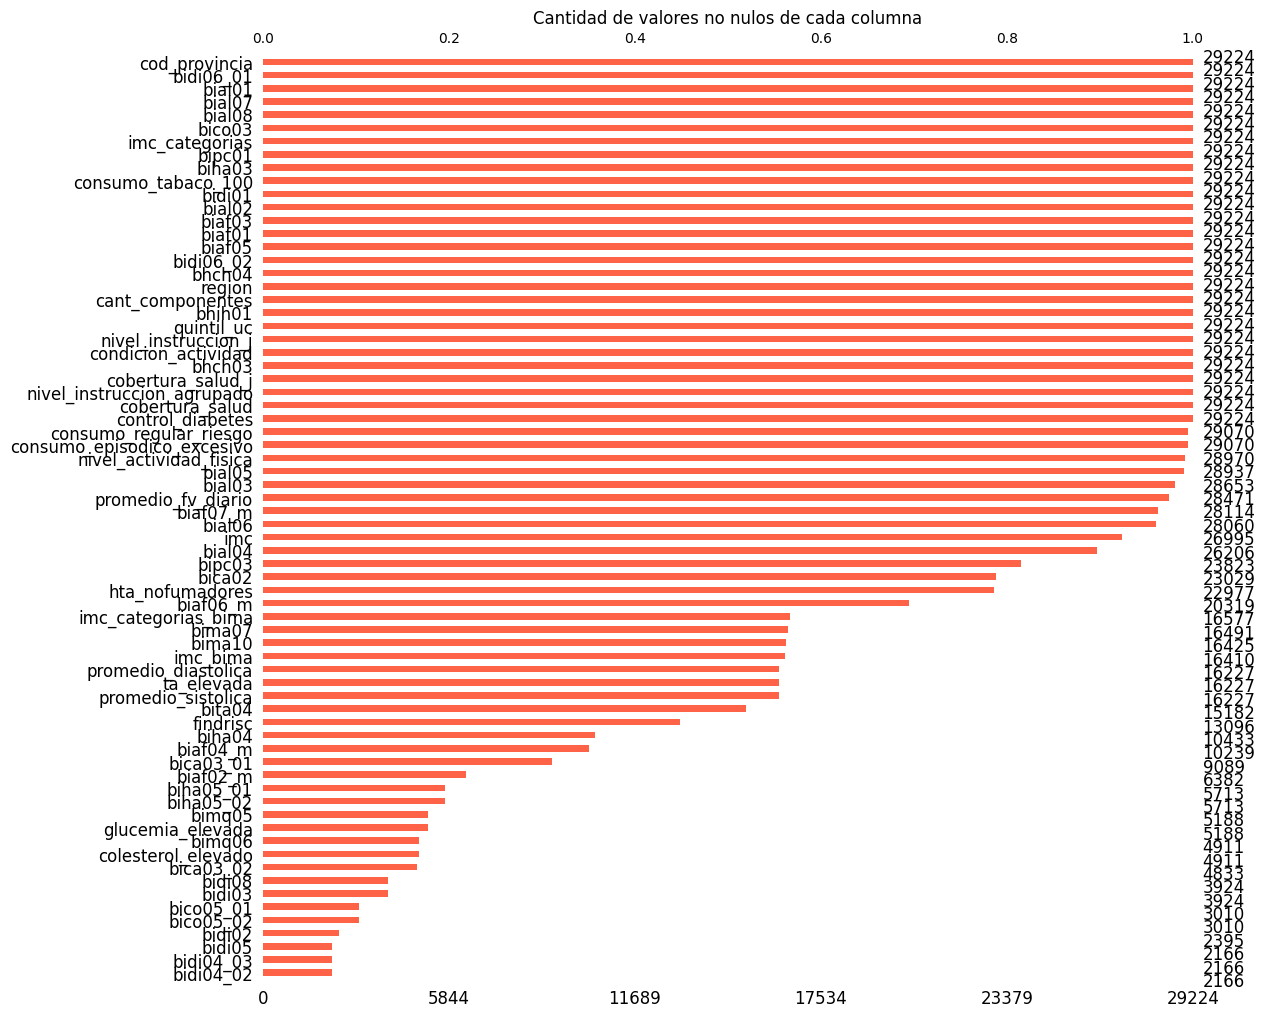

In [6]:
import missingno as msno
msno.bar(df,figsize=(12, 12), sort="ascending",fontsize=12, color='tomato')
plt.title('Cantidad de valores no nulos de cada columna')

---

*Utilizamos la libreria Missingno y visualizamos cuáles columnas están completas. Hay varias variables incompletas. Hay que decidir cuales dejamos y cuales eliminamos. Luego de las que dejemos ver el metodo de imputación*

---

Text(0.5, 1.0, 'Matriz  de valores faltantes por variable segun index')

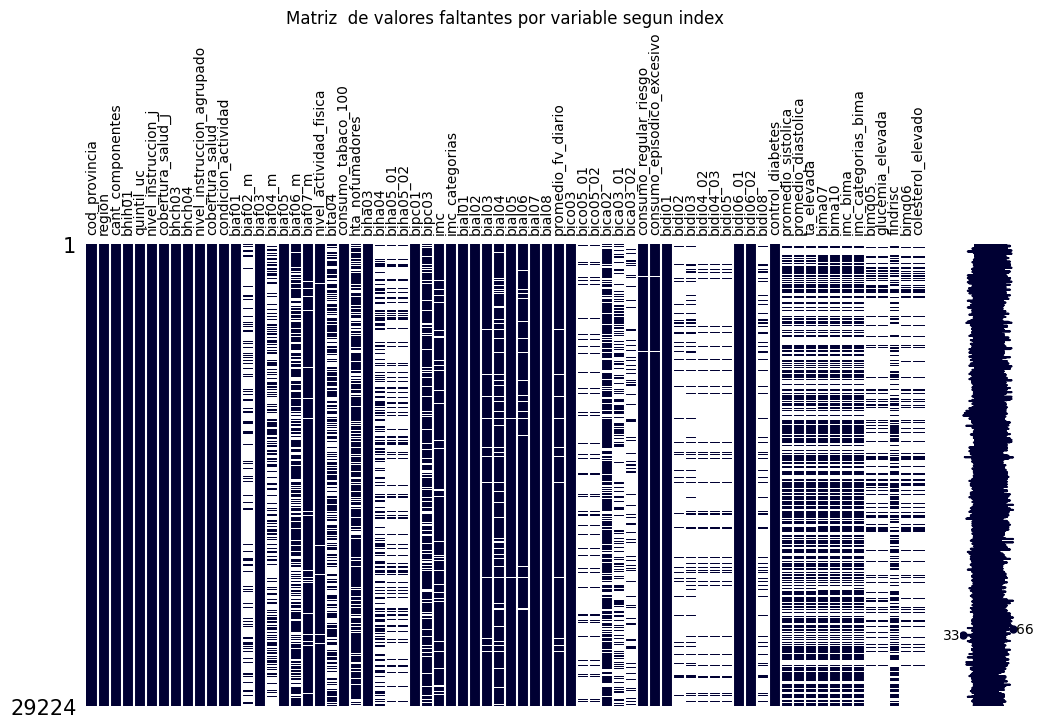

In [7]:
msno.matrix(df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])
plt.xticks(range(df.shape[1]), df.columns, rotation=90)
plt.title('Matriz  de valores faltantes por variable segun index')

---

*En el siguiente gráfico observamos la posición donde se encuentran los datos faltantes segun index. Podemos apreciar que tipo de perdida de datos tenemos, si es sistematica o aleatoria.*

*Deberiamos eliminar los datos en caso de que se trate de una perdida sistematica (o ver de imputar en caso de que sea mucha info a perder). A las observaciones con perdida aleatoria hay que elegirles un metodo de imputacion.*

*Observamos en el grafico que todos los datos indican tener una perdida aleatoria.*
---

#Seleccionamos las variables categóricas


##Vemos la distribución en las categorías.

In [8]:
df.bidi01.value_counts() #1=si 2=no ¿Alguna vez un médico, un enfermero u otro profesional de la salud le dijo que tenía diabetes o azúcar alta en la sangre?

2     25165
1      3924
99      135
Name: bidi01, dtype: int64

In [9]:
df.bidi04_03.value_counts() #1=si 2=no ¿Usted está haciendo algún tratamiento… con medicamentos?

1.0    1583
2.0     583
Name: bidi04_03, dtype: int64

In [10]:
df.bidi02.value_counts() #1=si 2=no ¿Eso ocurrió cuando estaba embarazada?

2.0     1835
1.0      537
99.0      23
Name: bidi02, dtype: int64

In [11]:
df.bidi05.value_counts()  #1=si 2=no ¿Es insulinodependiente?

2.0    1741
1.0     425
Name: bidi05, dtype: int64

In [12]:
df.bidi03.value_counts() #1=si 2=no ¿En las últimas dos semanas, estuvo haciendo algún tratamiento (medicamentos, dieta, ejercicio) indicado por un profesional de la salud para mantener controlada su diabetes/azúcar en sangre?

1.0    2166
2.0    1758
Name: bidi03, dtype: int64

In [13]:
df.control_diabetes.value_counts() #1=si 2=no Medición de la glucemia/azúcar en sangre alguna vez por autorreporte

1     22803
2      5471
99      950
Name: control_diabetes, dtype: int64

In [14]:
#Riesgo de desarrollar diabetes mellitus en los próximos 10 años según puntaje FINDRISC
#1. Muy bajo riesgo, 2. Bajo riesgo,  3. Riesgo moderado, 4. Alto riesgo , 5.Muy alto riesgo

df.findrisc.value_counts()

2.0    4208
1.0    3499
4.0    2561
3.0    2537
5.0     291
Name: findrisc, dtype: int64

---
Bibliografia para el enetendimiento de la variable 'findrisc' \
https://docs.bvsalud.org/biblioref/2020/07/1103357/18930-144814490444-1-pb.pdf

Se usan 8 variables para calcularlo
* edad
* uso previo de fármacos antihipertensivos
* antecedente personal de glucemia alterada
* ingesta diaria de vegetales y frutas
* realización de al menos 30 minutos de ejercicio diario
* la existencia de antecedente familiar de DM2 (de primera o segunda
línea)
* índice de masa corporal (IMC=peso/talla2)

---

Sospechamos que los datos de la variable 'findrisc' son complementarios a los de las personas con diabetes positivas indacadas en la variable 'bidi01'. Procedemos a analizar la tabla de contingencia.

In [15]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['findrisc'], df['bidi01'])

# 1 SI 2 NO
contingency_table

bidi01,1,2
findrisc,,
1.0,13,3486
2.0,179,4029
3.0,176,2361
4.0,520,2041
5.0,264,27


---
En base al analisis vemos que las variables mas adecuada a utilizar como target son las variables: 'bidi01' y 'findrisc'. Son las mas completas y las que nos permiten determinar una division del dataset en 3 clases de personas:
* Personas con diabetes.
* Personas con riesgo medio/alto.
* Personas sin riesgo ni diabetes.

El analisis nos mostro que en el dataset hay personas que se les diagnostico diabetees gestacional, la misma es una condicion que se da en ele embarazo. No se debe considerar como una enfermedad no transimisible. Entonces procedemos a eliminar a las personas con diabetes positiva en 'bidi01' con las personas que respondieron con SI a la variable 'bidi02'.

---

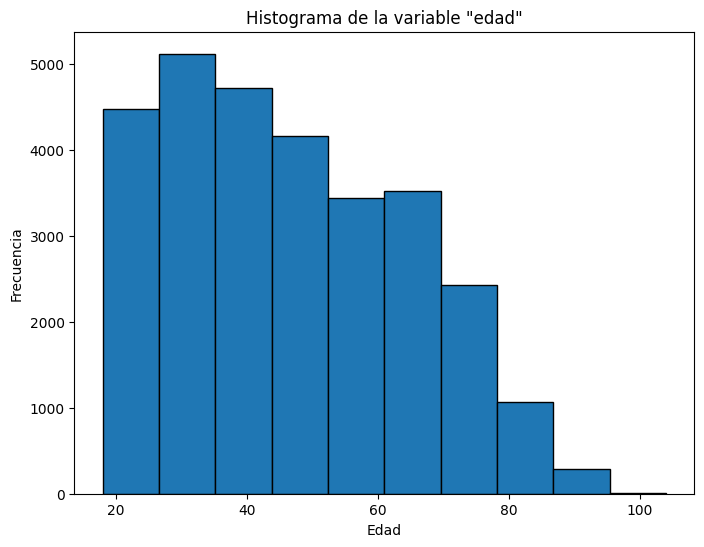

In [16]:
# Histograma DE EDAD
plt.figure(figsize=(8, 6))
plt.hist(df['bhch04'], bins=10, edgecolor='black')  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable "edad"')
plt.show()

---
Esta distribucion es asimetrica hacie la izquierda, indicando mayor numero de personas encuestadas JOVENES.


A continuacion, utilizamos la variable 'bidi01' como una vairable diagnostico de diabetes y la enfrenamos contra otras variables relevantes de las personas.

---

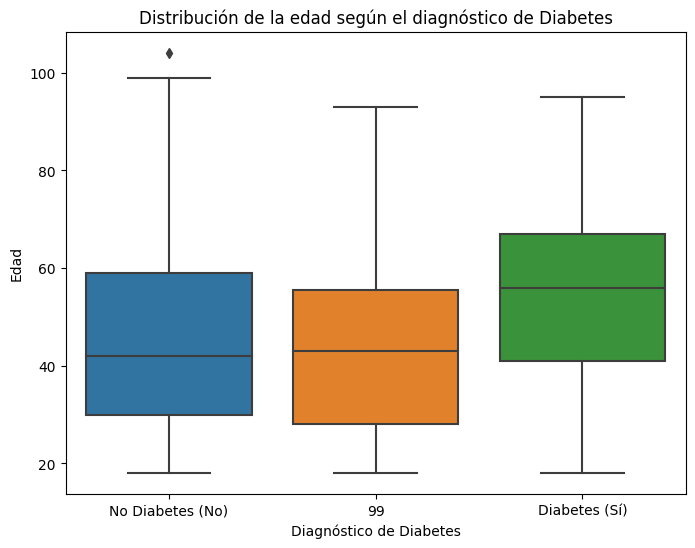

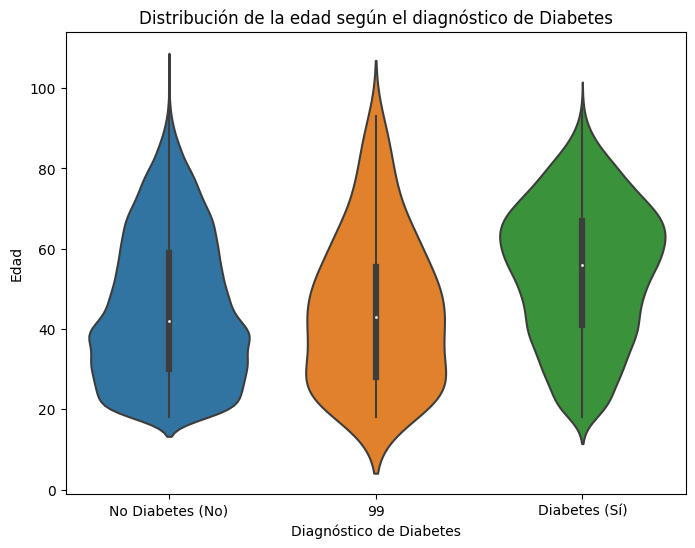

In [17]:
# Convertir los códigos 1 y 2 a etiquetas más descriptivas
df['bidi01'] = df['bidi01'].replace({1: 'Diabetes (Sí)', 2: 'No Diabetes (No)'})

# Gráfico de caja (boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='bidi01', y='bhch04', data=df)
plt.xlabel('Diagnóstico de Diabetes')
plt.ylabel('Edad')
plt.title('Distribución de la edad según el diagnóstico de Diabetes')
plt.show()

# Gráfico de violín (violin plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='bidi01', y='bhch04', data=df)
plt.xlabel('Diagnóstico de Diabetes')
plt.ylabel('Edad')
plt.title('Distribución de la edad según el diagnóstico de Diabetes')
plt.show()

Vemos una relacion entre la media de las edades dividiendolas segun el tipo de dignostico. Las personas diagnsticadas con diabetees tiene una media de edad en los 60 años.

##Hacemos eliminación de categorías innecesarias


In [18]:
df.bipc03.value_counts()

2.0    15044
1.0     8779
Name: bipc03, dtype: int64

In [19]:
df.bico03.value_counts()

2     22422
1      6383
99      419
Name: bico03, dtype: int64

In [20]:
df.bica02.value_counts()

1.0     14076
2.0      5619
3.0      3233
99.0      101
Name: bica02, dtype: int64

In [21]:
df.consumo_regular_riesgo.value_counts()

2.0    26885
1.0     2185
Name: consumo_regular_riesgo, dtype: int64

In [22]:
df.consumo_episodico_excesivo.value_counts()

2.0    25757
1.0     3313
Name: consumo_episodico_excesivo, dtype: int64

In [23]:
df.bidi05.value_counts()

2.0    1741
1.0     425
Name: bidi05, dtype: int64

In [24]:
#bidi02 la usamos para filtrar
#sacamos ta_elevada,glucemia_elevada, colesterol_elevado. Hay que volver a armar esta columna con las numericas.

In [25]:
#CODIGO QUE DROPEE DEL DF ORIGINAL LAS VARIBLES CATEGORICAS QUE NO QUEREMOS.
# Lista de columnas a eliminar
columnas_innecesarias = ['cod_provincia','region','quintil_uc','nivel_instruccion_j','cobertura_salud_j','biha04','biha05_01','biha05_02','bial08','bico05_01','bico05_02','bica02',
                         'bidi03','bidi04_02','bidi04_02','bidi06_01','bidi08','ta_elevada','glucemia_elevada','colesterol_elevado','bidi04_03']
df = df.drop(columns=columnas_innecesarias) #dropeamos

##Hacemos one hot encoding

In [26]:
#CODIGO DE ONE HOT
columns_to_encode = ["bhch03", "nivel_instruccion_agrupado", "cobertura_salud", "condicion_actividad",
                     "nivel_actividad_fisica", "consumo_tabaco_100", "bipc01", "imc_categorias", "bial01", "bico03", "consumo_regular_riesgo",
                      "consumo_episodico_excesivo", "bidi06_02","control_diabetes"] #Columnas seleccionadas

df_encoded = pd.get_dummies(df, columns=columns_to_encode) #Aplicamos One-Hot Encoding a las columnas categóricas seleccionadas

In [27]:
df_encoded.columns.tolist() #Para chequear el onehot encoding

['cant_componentes',
 'bhih01',
 'bhch04',
 'biaf01',
 'biaf02_m',
 'biaf03',
 'biaf04_m',
 'biaf05',
 'biaf06_m',
 'biaf07_m',
 'bita04',
 'hta_nofumadores',
 'biha03',
 'bipc03',
 'imc',
 'bial02',
 'bial03',
 'bial04',
 'bial05',
 'bial06',
 'bial07',
 'promedio_fv_diario',
 'bica03_01',
 'bica03_02',
 'bidi01',
 'bidi02',
 'bidi05',
 'promedio_sistolica',
 'promedio_diastolica',
 'bima07',
 'bima10',
 'imc_bima',
 'imc_categorias_bima',
 'bimq05',
 'findrisc',
 'bimq06',
 'bhch03_1',
 'bhch03_2',
 'nivel_instruccion_agrupado_1',
 'nivel_instruccion_agrupado_2',
 'nivel_instruccion_agrupado_3',
 'cobertura_salud_1',
 'cobertura_salud_2',
 'condicion_actividad_1',
 'condicion_actividad_2',
 'condicion_actividad_3',
 'nivel_actividad_fisica_1.0',
 'nivel_actividad_fisica_2.0',
 'nivel_actividad_fisica_3.0',
 'consumo_tabaco_100_1',
 'consumo_tabaco_100_2',
 'consumo_tabaco_100_3',
 'bipc01_1',
 'bipc01_2',
 'bipc01_99',
 'imc_categorias_1',
 'imc_categorias_2',
 'imc_categorias_3',
 '

#Seleccionamos las variables numéricas


Lista variables numericas:


*   Cantidad de miembros del hogar (cant_componentes)
*   Monto del ingreso total mensual del hogar en pesos (bhih01)
*   Edad en años cumplidos (bhch04)
*   Actividad fisica (biaf01)
*   Las actividades físicas moderadas son aquellas que le implican una ligera aceleración del ritmo cardiaco y la respiración. En la última semana, cuántos días realizó actividades físicas moderadas, durante al menos 10 minutos? (puede incluir caminata rapida) [Días por semana] (biaf03)
*   En los días de la semana en que usted realiza este tipo de actividades, ¿cuánto tiempo en total emplea en realizarlas?  [En minutos semanales] (biaf04_m)
*   En la última semana, ¿cuántos días caminó, durante al menos 10 minutos? [Días por semana] (biaf05)
*   En los días de la semana en que usted realiza este tipo de actividad, ¿cuánto tiempo en total emplea en realizarla? [En minutos semanales] (biaf06_m)
*   Habitualmente, ¿cuánto tiempo por día pasa sentado, por ejemplo en su casa, en el trabajo, o en clase?  [En minutos diarios (biaf07_m")
*   Indice de masa corporal por autorreporte (imc)
*   En una semana típica, ¿cuántos días come usted frutas frescas, cocidas, en jugos o licuados naturales? (bial03)
*   En una semana típica, ¿cuántas porciones de frutas come en uno de esos días? [Porciones por día] (bial04)
*   En una semana típica, ¿cuántos días come usted verduras? (bial05)
*   ¿Cuántas porciones de fruta come en uno de esos días? [Porciones por día] (bial06)
*   Promedio de consumo diario de frutas o verduras [Cantidad en porciones] (promedio_fv_diario)
*   ¿Con qué frecuencia tomó alguna bebida alcohólica en los últimos 30 días? [Días por semana] (bica03_01)
*   ¿Con qué frecuencia tomó alguna bebida alcohólica en los últimos 30 días? [Días por mes] (bica03_02)
*   Promedio de las dos últimas mediciones de tensión sistólica (promedio_sistolica)
*   Promedio de las dos últimas mediciones de tensión diastólica (promedio_diastolica)
*   Medición de la altura en centímetros (bima07)
*   Medición del peso en kilogramos (bima10)
*   Índice de masa corporal según mediciones antropométricas (imc_bima)
*   Registre los valores de glucosa que le informe el personal de Salud [Medición en mg/dl]  (bimq05)
*   Registre los valores de colesterol que le informe el personal de Salud [Medición en mg/dl] (bimq06)


In [28]:
interesting_cols_numericas = [ "cant_componentes", "bhih01", "bhch03", "bhch04",
                     "biaf01", "biaf02_m", "biaf03", "biaf04_m", "biaf05", "biaf06_m", "biaf07_m",
                    "imc", "bial03", "bial04","bial05", "bial06", "promedio_fv_diario", "bica03_01",
                     "bica03_02", "promedio_sistolica", "promedio_diastolica", "bima07", "bima10", "imc_bima",
                      "bimq05", "bimq06"]

df_numericas = df[interesting_cols_numericas]

##Vemos variables incompletas

In [29]:
total_personas = len(df_numericas.bhih01)
valores_faltantes = (((df_numericas.isnull().sum())/total_personas)*100).map('{:.2f}%'.format)
print(valores_faltantes) #Vemos cual es el porcentaje de datos faltantes respecto del total de datos.

cant_componentes        0.00%
bhih01                  0.00%
bhch03                  0.00%
bhch04                  0.00%
biaf01                  0.00%
biaf02_m               78.16%
biaf03                  0.00%
biaf04_m               64.96%
biaf05                  0.00%
biaf06_m               30.47%
biaf07_m                3.80%
imc                     7.63%
bial03                  1.95%
bial04                 10.33%
bial05                  0.98%
bial06                  3.98%
promedio_fv_diario      2.58%
bica03_01              68.90%
bica03_02              83.46%
promedio_sistolica     44.47%
promedio_diastolica    44.47%
bima07                 43.57%
bima10                 43.80%
imc_bima               43.85%
bimq05                 82.25%
bimq06                 83.20%
dtype: object


Text(0.5, 1.0, 'Cantidad de valores no nulos de cada columna')

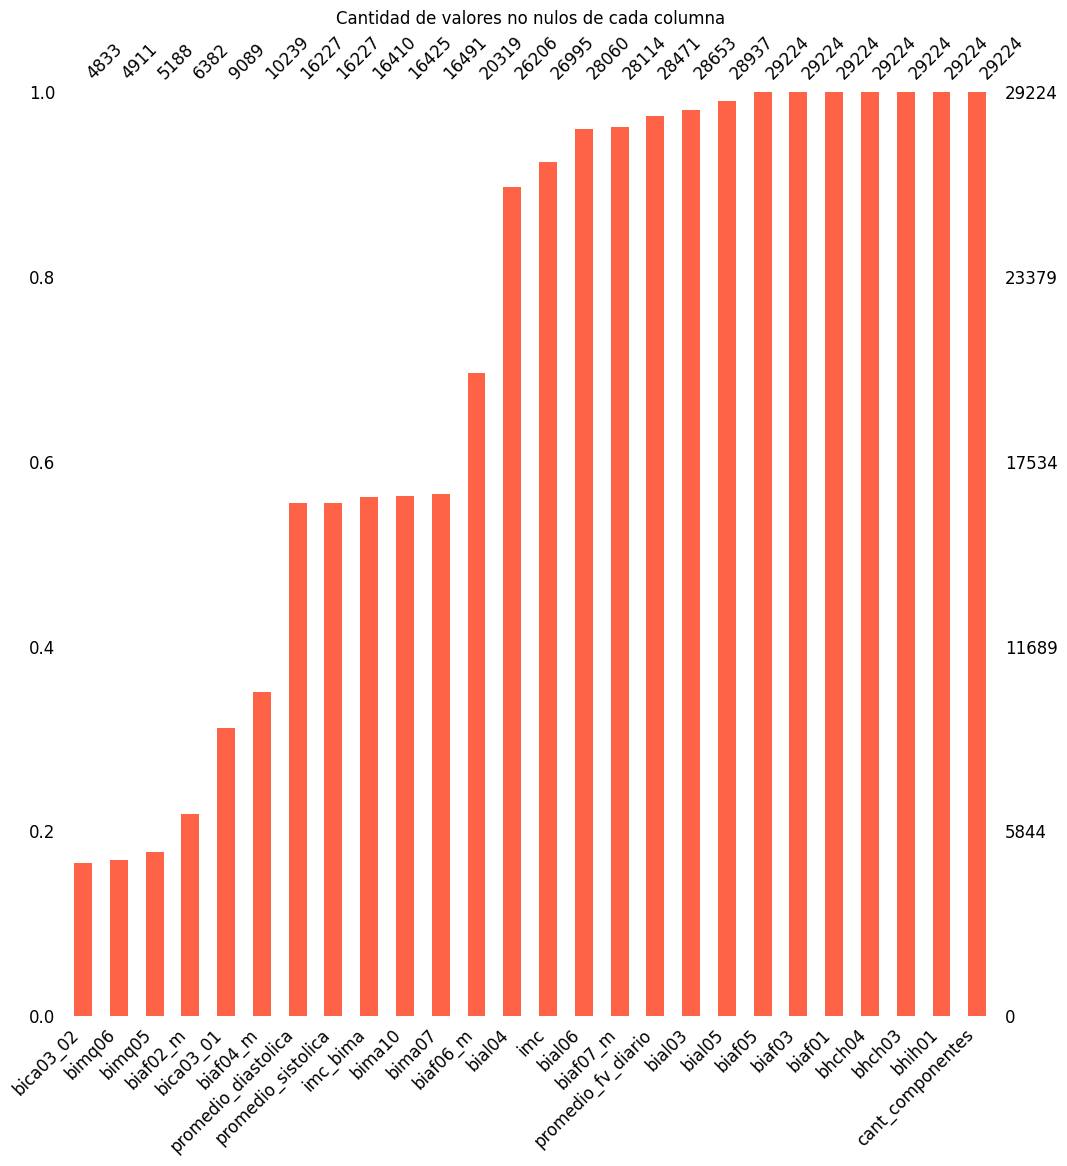

In [30]:
import missingno as msno
msno.bar(df_numericas,figsize=(12, 12), sort="ascending",fontsize=12, color='tomato')
plt.title('Cantidad de valores no nulos de cada columna')

Text(0.5, 1.0, 'Matriz  de valores faltantes por variable segun index')

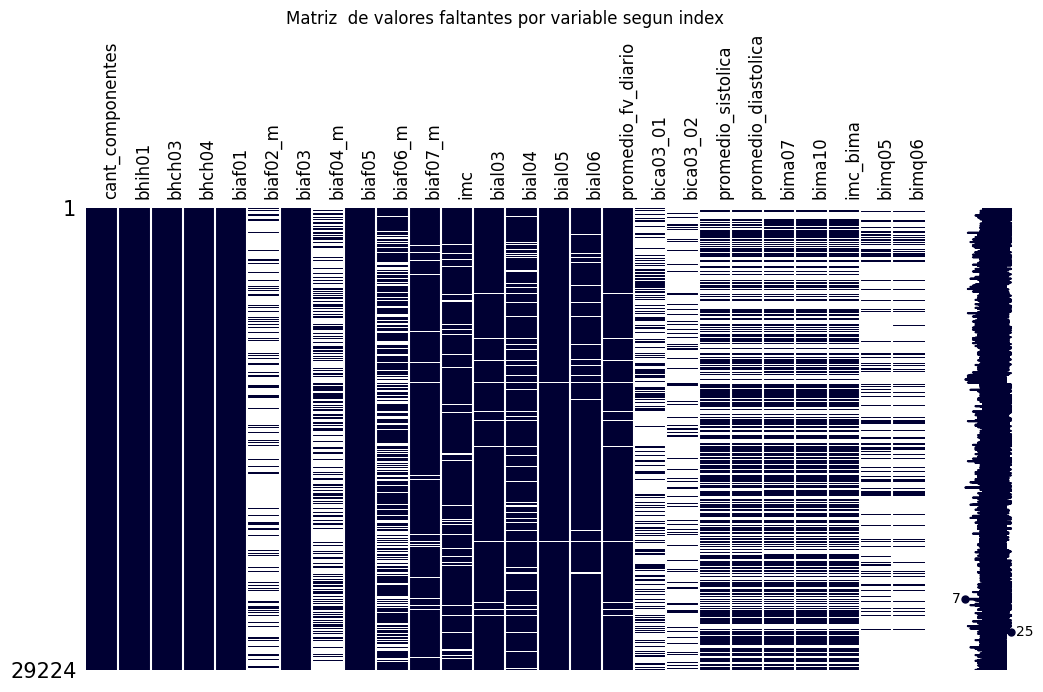

In [31]:
msno.matrix(df_numericas,figsize=(12, 6), fontsize=12, color=[0,0,0.2])
plt.xticks(range(df_numericas.shape[1]), df_numericas.columns, rotation=90)
plt.title('Matriz  de valores faltantes por variable segun index')

De las variables que tienen valores faltantes, definimos que aquellas cuyos valores faltantes superen el 40% realizaremos metodos de imputación por KNN, y a aquellas que estén por debajo le aplicaremos metodos de imputación estadistico utilizando la media.

##Hacemos eliminaciones

Las siguientes variables numericas no serán tenidas en cuenta, por un lado porque tienen una cantidad de valores faltantes elevado y porque no aportan valor al análisis realizado. Son: bica03_02, biaf02_m y biaf04_m.

In [32]:
#CODIGO QUE DROPPEE SOBRE EL DF QUE DROPPEO CATEGORICAS NO RELEVANTES
# Lista de columnas a eliminar
columnas_innecesarias = ['bica03_02','biaf02_m','biaf04_m']
#¿Con qué frecuencia tomó alguna bebida alcohólica en los últimos 30 días? [Días por mes]
#En los días de la semana en que usted realiza este tipo de actividades, ¿cuánto tiempo en total emplea en realizarlas?  [En minutos semanales] INTENSAS
#En los días de la semana en que usted realiza este tipo de actividades, ¿cuánto tiempo en total emplea en realizarlas?  [En minutos semanales] MODERADAS
df_dropped = df_encoded.drop(columns=columnas_innecesarias) #dropeamos

##Normalizamos


In [33]:
#CODIGO QUE NORMALICE SOBRE EL DF DROPPEADO DE NUMERICAS Y SIN LAS CATEGORICAS NO RELEVANTES

# Lista de nombres de columnas numéricas a normalizar
columnas_numericas = [ "cant_componentes", "bhih01", "bhch04",
                     "biaf01", "biaf03", "biaf05", "biaf06_m", "biaf07_m",
                    "imc", "bial03", "bial04","bial05", "bial06", "promedio_fv_diario", "bica03_01",
                     "promedio_sistolica", "promedio_diastolica", "bima07", "bima10", "imc_bima",
                      "bimq05", "bimq06"]

# Función para normalizar solo las columnas numéricas
def normalizar_columnas_numericas(column):
    if column.name in columnas_numericas:
        return (column - column.min()) / (column.max() - column.min())
    else:
        return column

# Aplicar la función a las columnas del DataFrame
df_normalized = df_dropped.apply(normalizar_columnas_numericas)

##Hacemos imputaciones por media

Siguiendo el criterio mencionado, las siguientes columnás se les aplicará el metodo de imputación por un estadistico, en este caso la media: biaf06_m , biaf07_m , imc , bial03 , bial04 , bial05 , bial06.

In [34]:
from sklearn.impute import SimpleImputer
df_normalized_mean = df_normalized.copy()
#Ahora si, imputamos en las variables que necesitamos
mean_imputation_variables = ['biaf06_m', 'biaf07_m', 'imc', 'bial03', 'bial04', 'bial05', 'bial06',
                            'promedio_fv_diario'] #Variables con menos del 40% de datos faltantes. A imputar

mean_imputer = SimpleImputer(strategy='mean')

df_normalized_mean[mean_imputation_variables] = mean_imputer.fit_transform(df_normalized_mean[mean_imputation_variables])

Text(0.5, 1.0, 'Cantidad de valores no nulos de cada columna')

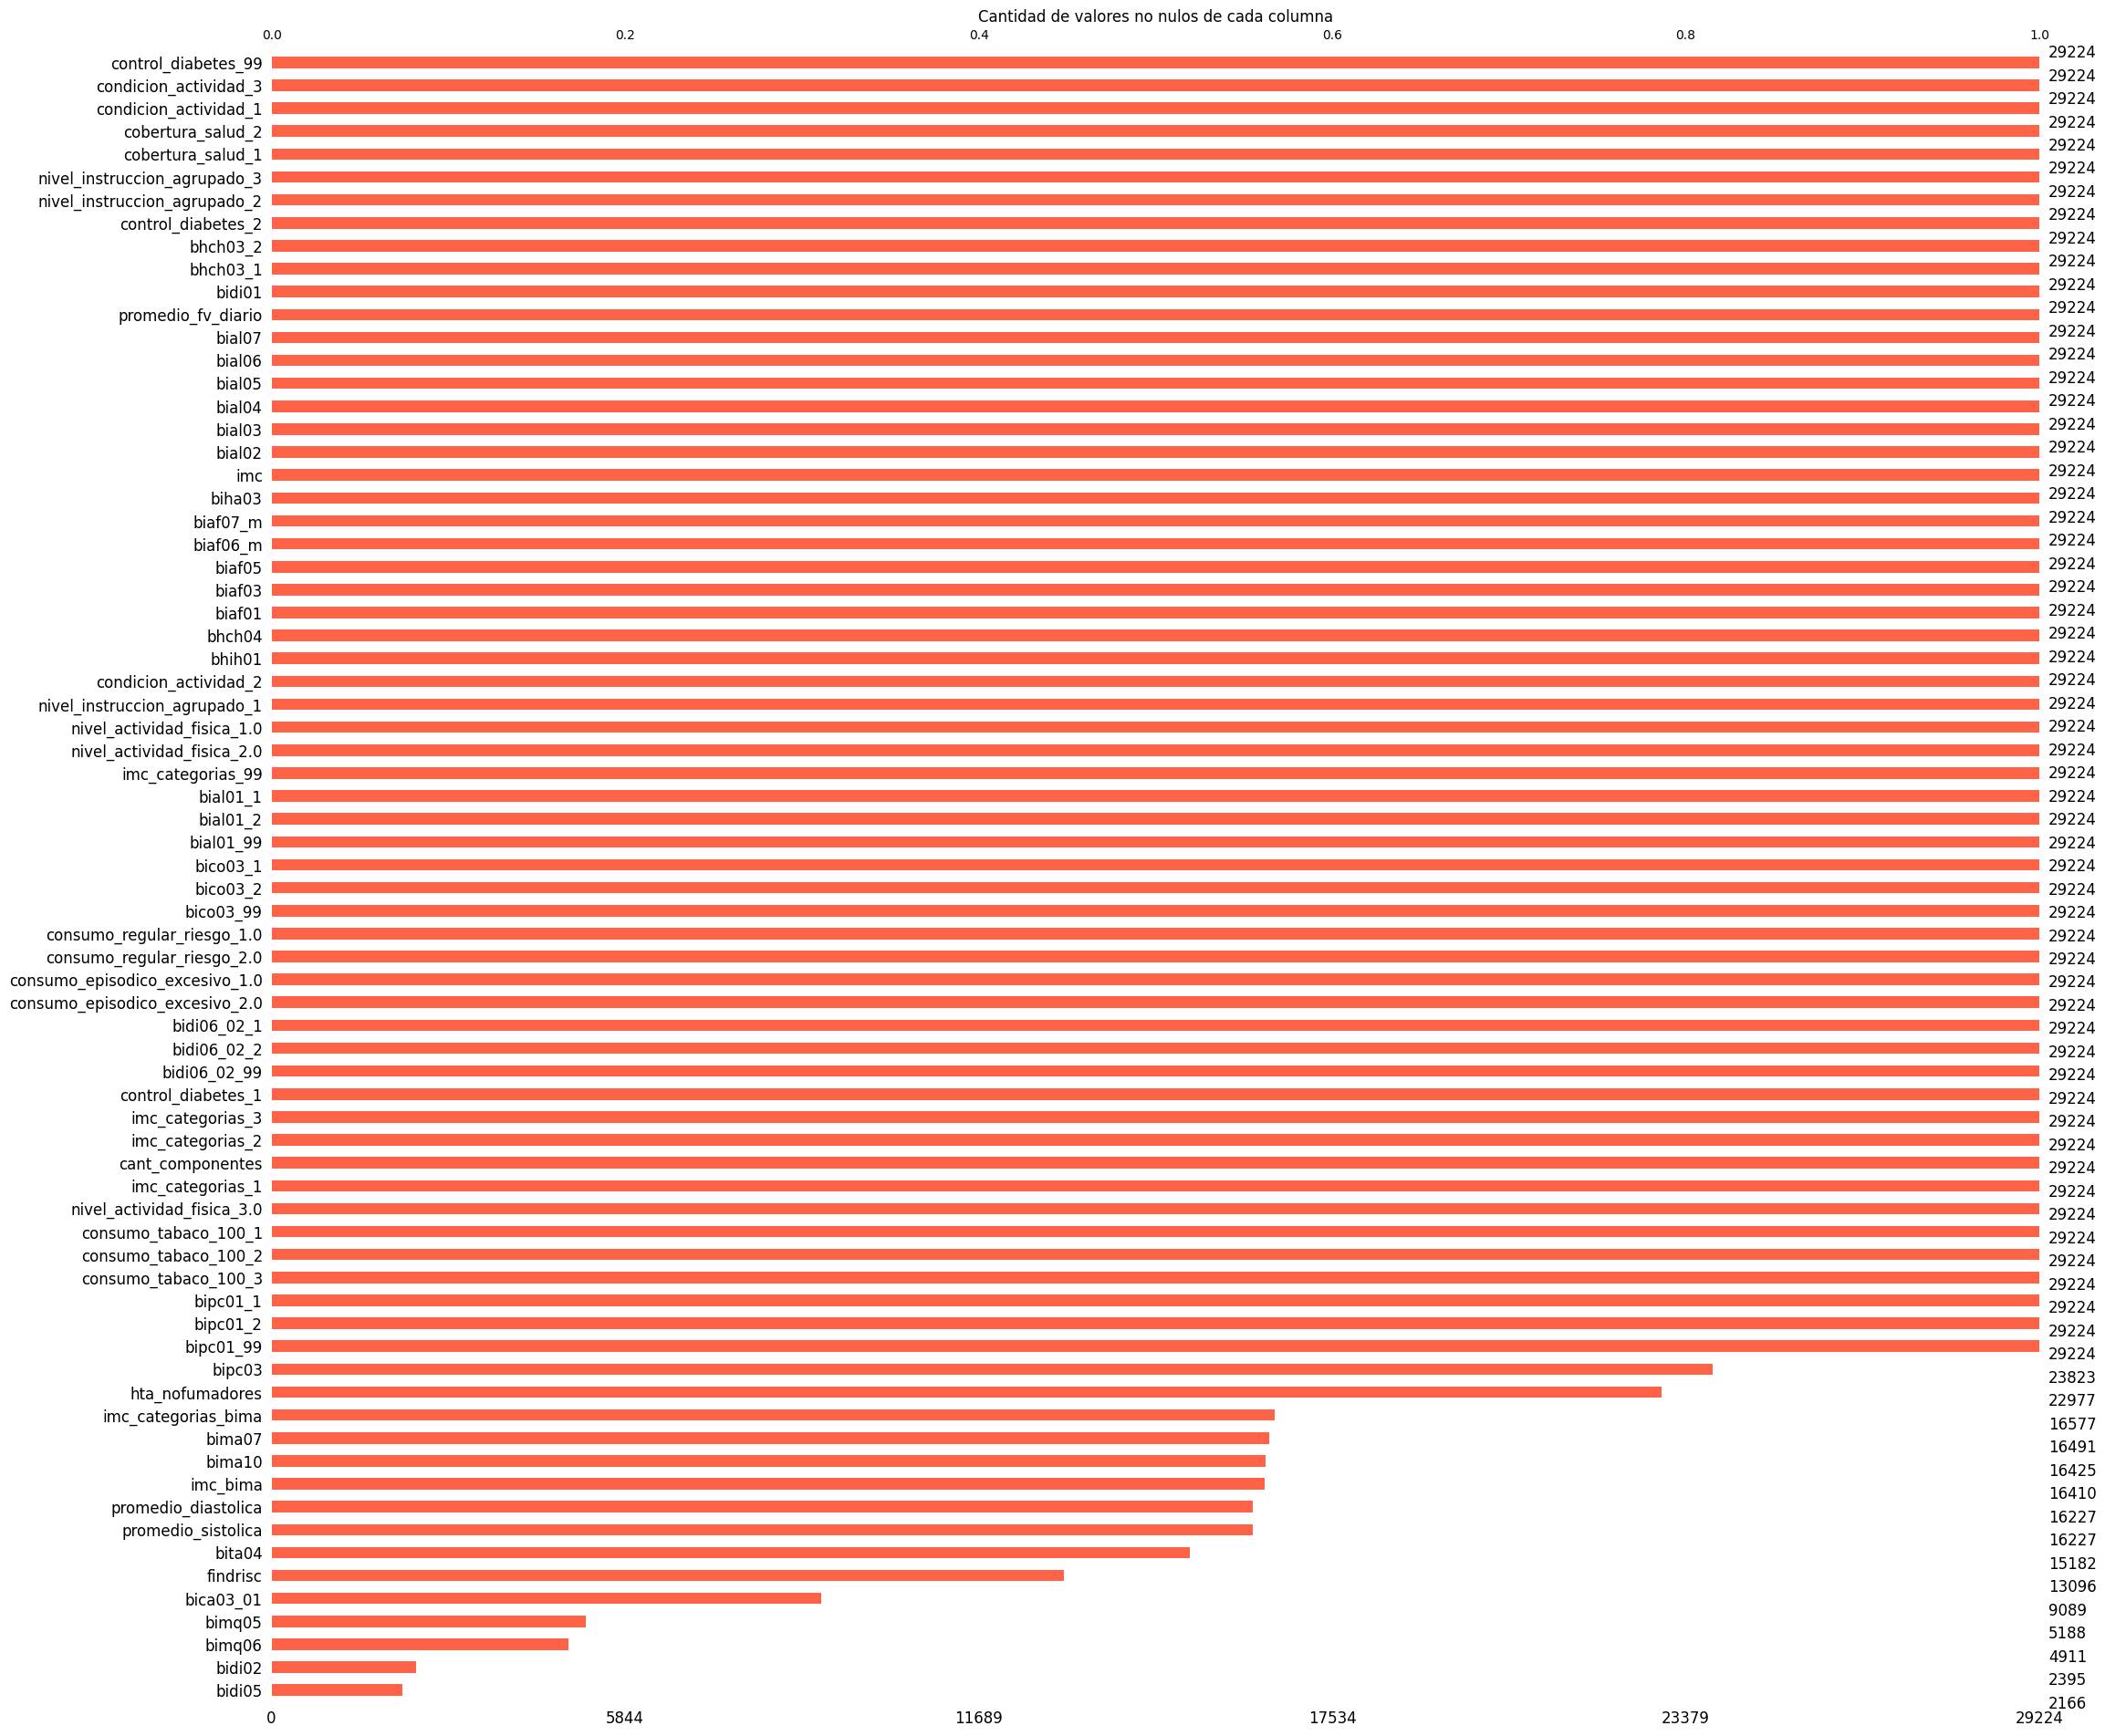

In [35]:
msno.bar(df_normalized_mean, sort="ascending",fontsize=12, color='tomato')
plt.title('Cantidad de valores no nulos de cada columna')

##Hacemos imputación KNN


In [36]:
from sklearn.impute import KNNImputer

# Columnas que no serán imputadas
columnas_no_imputacion = ['bipc03', 'hta_nofumadores', 'imc_categorias_bima', 'bita04', 'findrisc', 'bidi01','bidi02','bidi05']
data_no_imputacion = df_normalized_mean[columnas_no_imputacion]

# Columnas que serán imputadas
columnas_a_imputar = [col for col in df_normalized_mean.columns if col not in columnas_no_imputacion]
df_for_impute = df_normalized_mean[columnas_a_imputar]

# Realizar la imputación utilizando KNN
imputer = KNNImputer(n_neighbors=2)
data_imputado = imputer.fit_transform(df_for_impute)

# Convertir el resultado de la imputación nuevamente a un DataFrame con los nombres de columna originales
df_imputado_KNN = pd.DataFrame(data_imputado, columns=columnas_a_imputar)

# Combinar los datos imputados con las columnas no imputadas
data_completo = pd.concat([df_imputado_KNN, data_no_imputacion], axis=1)


Text(0.5, 1.0, 'Cantidad de valores no nulos de cada columna')

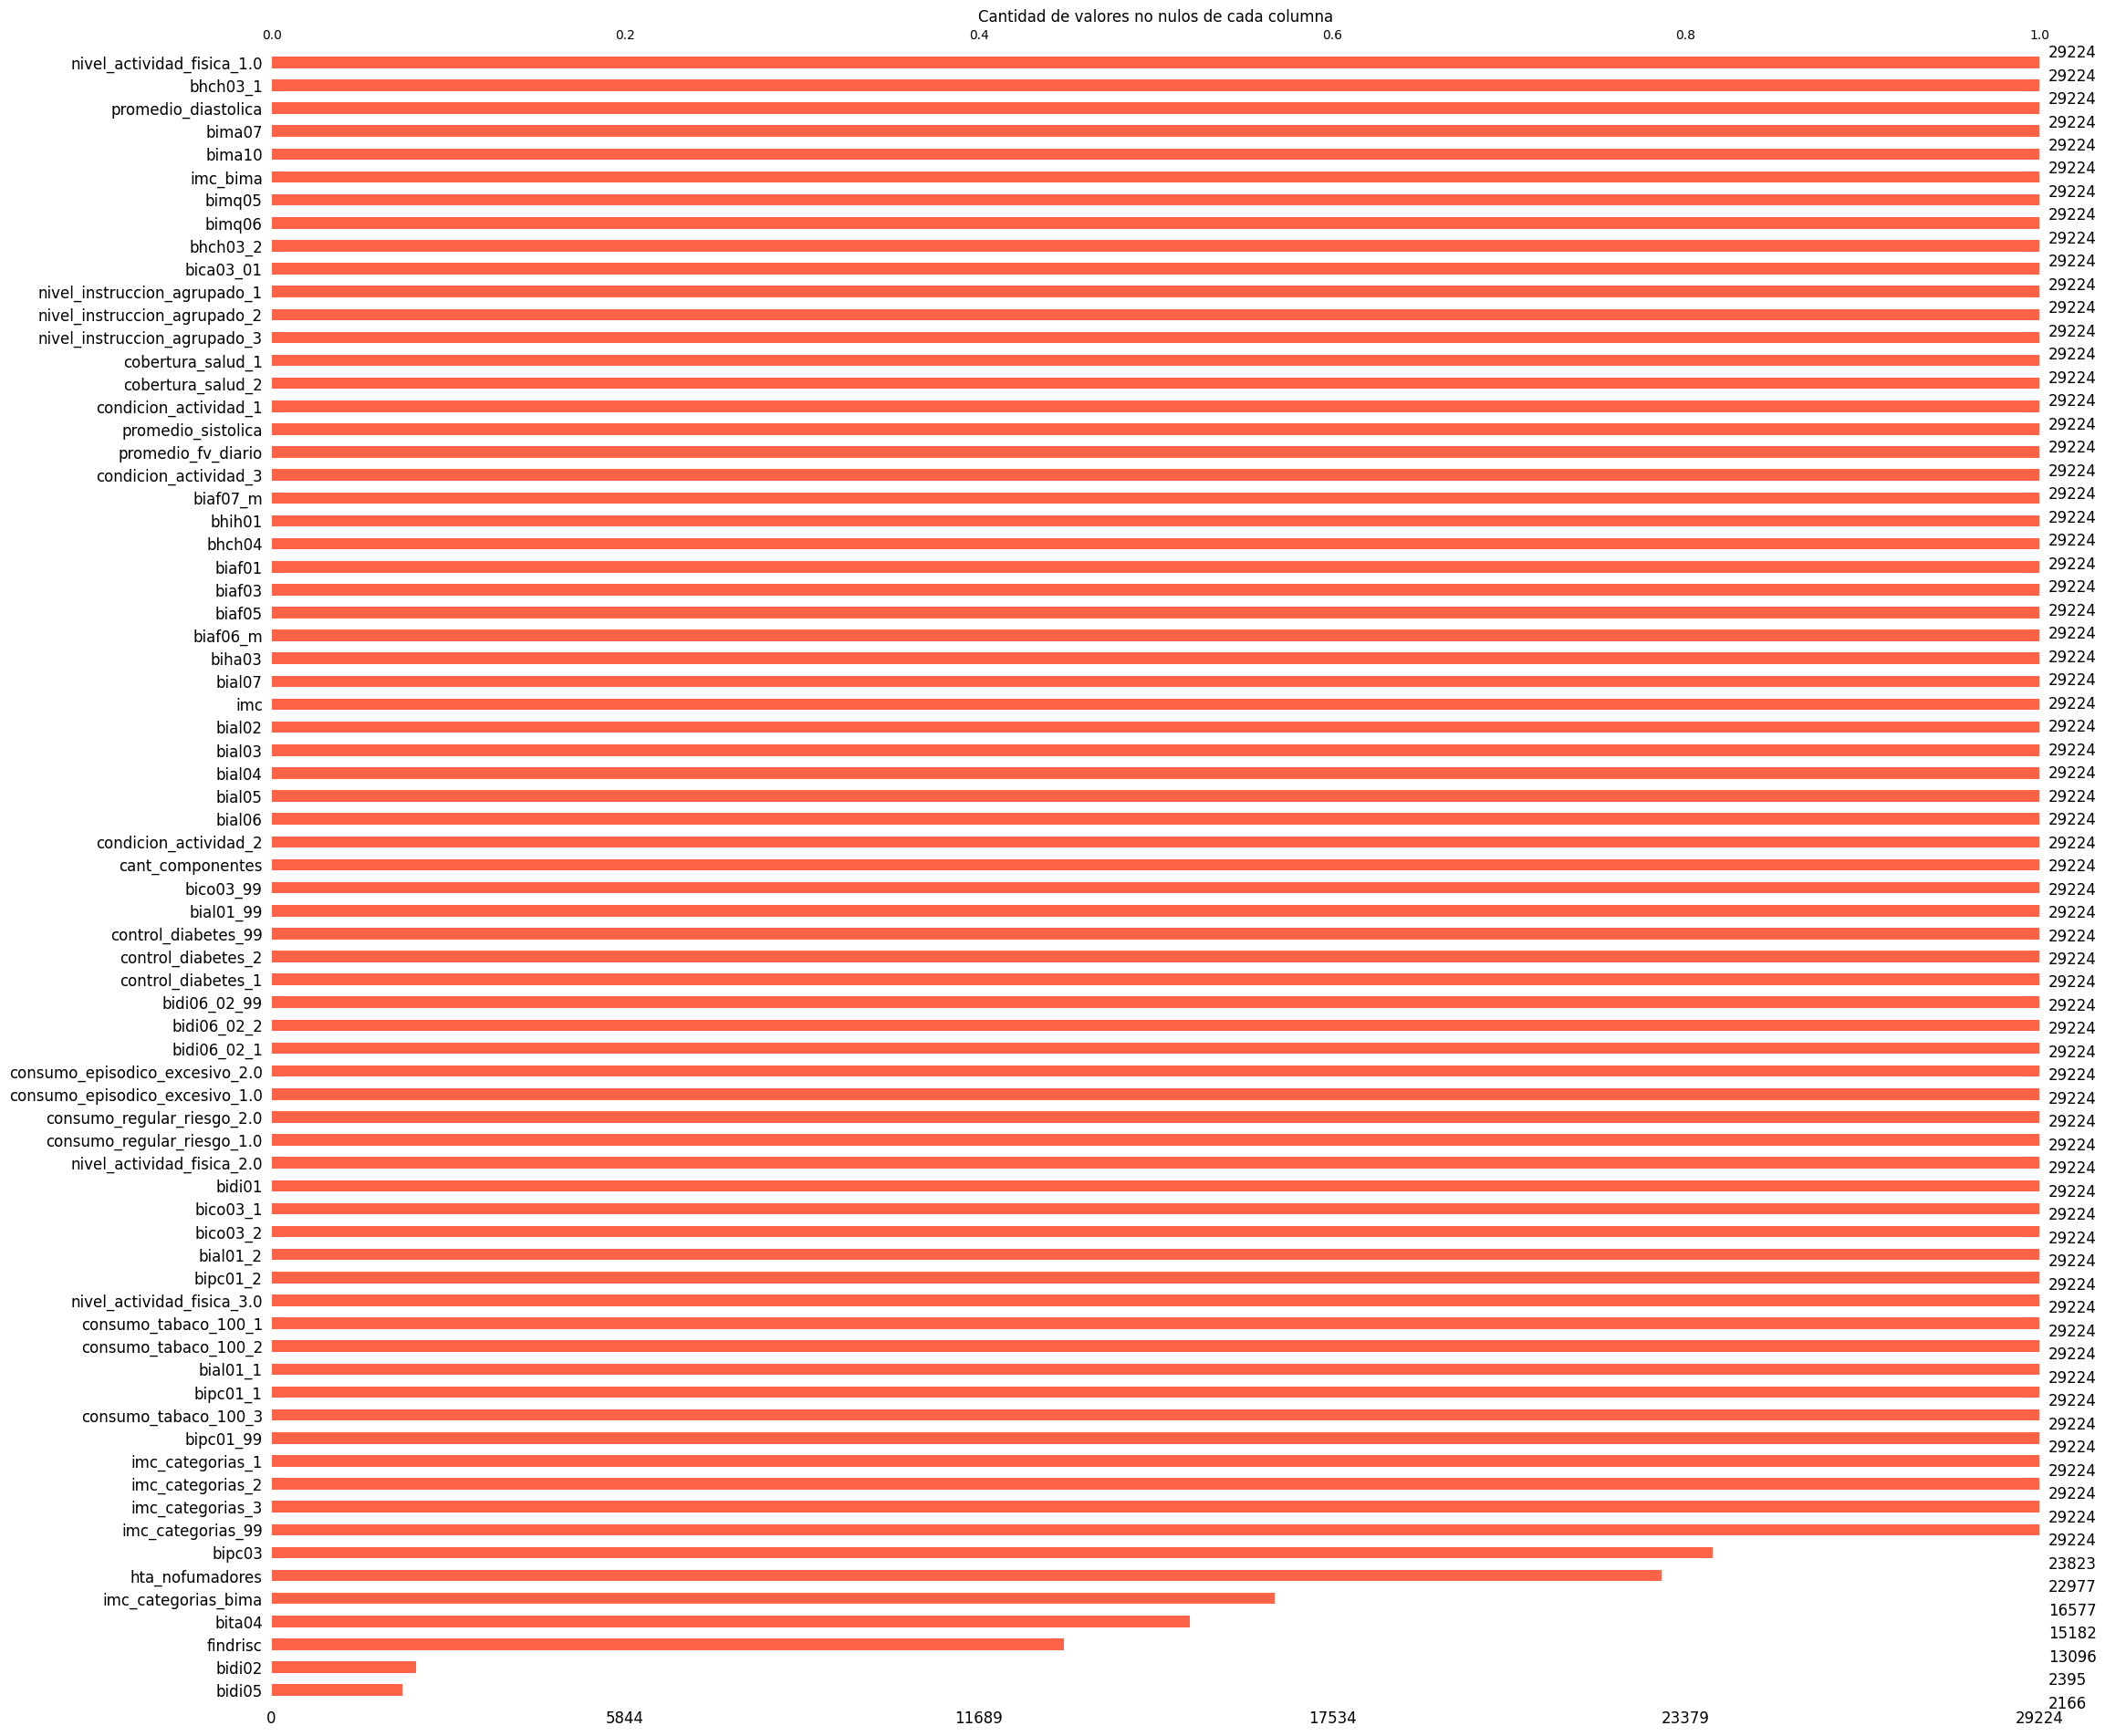

In [37]:
msno.bar(data_completo, sort="ascending",fontsize=12, color='tomato')
plt.title('Cantidad de valores no nulos de cada columna')

#Dataset con las categoricas imputadas

In [38]:
#DATASET RESULTANTE VER GRAFICOS DE MSGNO.

from sklearn.impute import SimpleImputer
data_completo_mean = data_completo.copy()
#Ahora si, imputamos en las variables que necesitamos
mean_imputation_variables = ['bipc03', 'hta_nofumadores', 'imc_categorias_bima', 'bita04'] #Variables categoricas a imputar.

mean_imputer = SimpleImputer(strategy='most_frequent')

data_completo_mean[mean_imputation_variables] = mean_imputer.fit_transform(data_completo_mean[mean_imputation_variables])

In [39]:
data_completo_mean.tail(3) #Chequeamos dataset

,cant_componentes,bhih01,bhch04,biaf01,biaf03,biaf05,biaf06_m,biaf07_m,biha03,imc,...,control_diabetes_2,control_diabetes_99,bipc03,hta_nofumadores,imc_categorias_bima,bita04,findrisc,bidi01,bidi02,bidi05
29221,0.285714,0.121429,0.651163,0.0,0.0,1.000000,0.534791,0.142957,2.0,0.272340,...,0.0,0.0,2.0,2.0,2.0,3.0,3.0,No Diabetes (No),NaN,NaN
29222,0.357143,0.214286,0.302326,0.0,0.0,0.857143,0.534791,0.122036,3.0,0.235033,...,0.0,0.0,2.0,2.0,2.0,1.0,NaN,Diabetes (Sí),1.0,NaN
29223,0.071429,0.107143,0.255814,0.0,0.0,1.000000,0.081511,0.038354,2.0,0.377509,...,0.0,0.0,2.0,1.0,3.0,3.0,NaN,Diabetes (Sí),1.0,1.0


#Armamos la variable target con dataset curado

VARIABLES TARGET: \
0: No tienen riesgo de diabetes. \
1: Tienen riesgo de diabetes. Irian los de la variable 'findrisc' sin los de 'bidi01'. \
2: Tienen diabetes. Solo 'bidi01'. \

In [40]:
data_completo_mean.findrisc.value_counts()

2.0    4208
1.0    3499
4.0    2561
3.0    2537
5.0     291
Name: findrisc, dtype: int64

In [41]:
data_completo_mean.bidi01.value_counts()

No Diabetes (No)    25165
Diabetes (Sí)        3924
99                    135
Name: bidi01, dtype: int64

In [42]:
data_completo_mean.bidi02.value_counts()

2.0     1835
1.0      537
99.0      23
Name: bidi02, dtype: int64

In [43]:
#Tabla de contingencia
contingency_table = pd.crosstab(data_completo_mean['bidi01'], data_completo_mean['bidi02'])
#bidi02: Ocurrio cuando estaba embarazada?
#1 SI 2 NO 3 NS/NC
contingency_table

bidi02,1.0,2.0,99.0
bidi01,,,
Diabetes (Sí),537,1835,23


In [44]:
# Definir función para crear la nueva variable "target"
def create_target(row):
    if row['findrisc'] in [3,4,5] and row['bidi01'] == 'No Diabetes (No)': #Ponemos los riesgo de diabetes medios y altos y aseguramos que todavia no tienen diabetes
        return 1
    elif row['bidi01'] == 'Diabetes (Sí)' and row['bidi02'] != '1': #Personas con diabetes diagnosticada sin ser diabetes gestacional
        return 2
    else:
        return 0 #NO TIENEN DIABETES NI TIENEN RIESGO (O ES MUY BAJO).

# Aplicar la función para crear la nueva variable "target"
data_completo_mean['Target'] = data_completo_mean.apply(create_target, axis=1)

# Mostrar el dataframe resultante
print(data_completo_mean.Target)

0        0
1        0
2        0
3        0
4        0
        ..
29219    0
29220    1
29221    1
29222    2
29223    2
Name: Target, Length: 29224, dtype: int64


In [45]:
counts = data_completo_mean['Target'].value_counts()
print(counts)

0    20871
1     4429
2     3924
Name: Target, dtype: int64


---
La siguiente seccion la realizamos para ver el comportamiento de las variables de interes contra la varaible creada "Target". Por fuera del alcance del tp de exploracion y curacion.

---

In [46]:
data_completo_mean.tail(3)

,cant_componentes,bhih01,bhch04,biaf01,biaf03,biaf05,biaf06_m,biaf07_m,biha03,imc,...,control_diabetes_99,bipc03,hta_nofumadores,imc_categorias_bima,bita04,findrisc,bidi01,bidi02,bidi05,Target
29221,0.285714,0.121429,0.651163,0.0,0.0,1.000000,0.534791,0.142957,2.0,0.272340,...,0.0,2.0,2.0,2.0,3.0,3.0,No Diabetes (No),NaN,NaN,1
29222,0.357143,0.214286,0.302326,0.0,0.0,0.857143,0.534791,0.122036,3.0,0.235033,...,0.0,2.0,2.0,2.0,1.0,NaN,Diabetes (Sí),1.0,NaN,2
29223,0.071429,0.107143,0.255814,0.0,0.0,1.000000,0.081511,0.038354,2.0,0.377509,...,0.0,2.0,1.0,3.0,3.0,NaN,Diabetes (Sí),1.0,1.0,2


In [47]:
from google.colab import files

data_completo_mean.to_csv('data_completo_mean.csv')
files.download('data_completo_mean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Analizamos la variable target con tablas de contingencia

##ANALISIS VARIABLES CATEGORICAS

SEXO BIOLOGICO

---

In [48]:
df_final = data_completo_mean.copy()

In [49]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['bhch03'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes
# 1 Varon 2 Mujer
#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
bhch03,,,
1,74.412325,13.445044,12.142630
2,69.149832,16.450216,14.399952


Dentro de la poblacion femenina tenemos que el 69,14% NO padece diabetes.
Dentro de la poblacion masculina tenemos que el 74.41% NO padece diabetes.
Se intuye que la diabetes tiene una distribucion distinta en varones y en mujeres, teniendo mayor porcentaje de diagnostico positivo en las mujeres que en hombres

In [50]:
#TABLA DE CONTINGENCIA CON RESPECTO A LAS COLUMNAS
# Calcular la tabla de contingencia en porcentajes respecto a las columnas
contingency_table_porcentajes_columnas = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

# Mostrar la tabla de contingencia en porcentajes con respecto a las columnas
print(contingency_table_porcentajes_columnas)

Target         0          1          2
bhch03                                
1       44.89483  38.225333  38.965341
2       55.10517  61.774667  61.034659


Dentro de la poblacion en estudio, analizando a las personas con diabetes y con riesgo de padecerla, tenemos que hay mayor porcentaje de mujeres.

NIVEL EDUACTIVO

---

In [51]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['nivel_instruccion_agrupado'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes
#1 Hasta primario incompleto 2 Primario completo y secundario incompleto 3 Secundario completo y más 4 Educación especial
#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
nivel_instruccion_agrupado,,,
1,56.529851,22.500000,20.970149
2,66.877186,17.780801,15.342013
3,76.747477,12.281565,10.970957


De las categorias de nivel educativo, la poblacion con primario incompleto tiene su distribucion de datos mayor en personas con riesgo de diabetes y diabetes diagnosticada con respecto a las otras dos poblaciones.

Si estas dentro de las personas con primario incompleto podes tener mayor probabilidad de caer en el grupo de riesgo o con diabetes diagnosticada.

Mientras menor es el nivel educativo alcanzado hay mayor porcentaje de tener diabetes y riesgo de adquirirla.

In [52]:
#TABLA DE CONTINGENCIA CON RESPECTO A LAS COLUMNAS
# Calcular la tabla de contingencia en porcentajes respecto a las columnas
contingency_table_porcentajes_columnas = contingency_table.div(contingency_table.sum(axis=0), axis=1) * 100

# Mostrar la tabla de contingencia en porcentajes con respecto a las columnas
print(contingency_table_porcentajes_columnas)

Target                              0          1          2
nivel_instruccion_agrupado                                 
1                            7.258876  13.614811  14.322120
2                           32.978774  41.318582  40.239551
3                           59.762350  45.066606  45.438328


Si ahora comparamos dentro de las personas con diabetes, tenes mayor probabilidad de tener secundario completo.

COBERTURA DE SALUD

---

In [53]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['cobertura_salud'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes
#1 Con obra social o prepaga 2 Sólo cobertura pública
#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
cobertura_salud,,,
1,69.036957,16.372226,14.590817
2,76.850500,12.377850,10.771650


Hay mayor porcentaje de
Es menor cuando para los que solo tienen cobertura publica

CONDICION DE ACTIVIDAD

---

In [54]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['condicion_actividad'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes

#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
condicion_actividad,,,
1,76.199909,13.085805,10.714286
2,79.037037,9.333333,11.629630
3,62.130120,19.508132,18.361748


NIVEL DE ACTIVIDAD FISICA

---

In [55]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['nivel_actividad_fisica'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes

#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
nivel_actividad_fisica,,,
1.0,82.897716,8.623173,8.479111
2.0,74.263071,13.259882,12.477046
3.0,65.053763,19.107817,15.838419


La mayoria tiene un nivel bajo

A medida que se disminuye la actividad fisica aumenta Diabetes Si

CONSUMO DE TABACO

In [56]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['consumo_tabaco_100'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes

#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
consumo_tabaco_100,,,
1,75.956459,13.398431,10.645110
2,64.042222,18.342274,17.615504
3,72.246773,14.722642,13.030585


HTA

---
¿Cuántas veces un médico, un enfermero u otro profesional de la salud le dijo que tenía presión alta?

In [57]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['biha03'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes

#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
biha03,,,
1,63.784666,19.603045,16.612289
2,50.599556,24.603997,24.796447
3,80.268045,11.012433,8.719522
99,91.509434,0.000000,8.490566


Hay relacion entre la HTA y la Diabetes

IMC

---


In [58]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['imc_categorias'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes

#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
imc_categorias,,,
1,87.299829,4.743680,7.956491
2,71.793597,15.072579,13.133824
3,50.342466,28.296233,21.361301
99,65.231045,20.592194,14.176761


Se ve la relacion CON el IMC

En una semana típica, ¿cuántas porciones de frutas come en uno de esos días? [Porciones por día]

In [59]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['bial05'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes

#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
bial05,,,
0.0,72.817680,16.906077,10.276243
1.0,69.342604,15.992415,14.664981
2.0,70.784435,16.985794,12.229771
3.0,71.908939,15.413534,12.677527
4.0,71.977476,15.733687,12.288837
5.0,73.675719,13.874697,12.449583
6.0,70.993377,14.834437,14.172185
7.0,70.194575,14.897799,14.907626


En una semana típica, ¿cuántos días come usted frutas frescas, cocidas, en jugos o licuados naturales?

In [60]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['bial03'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes

#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
bial03,,,
0.0,71.884735,16.783489,11.331776
1.0,71.330590,17.215364,11.454047
2.0,71.277400,16.679264,12.043336
3.0,73.744721,15.016424,11.238855
4.0,77.112135,11.725550,11.162314
5.0,72.266560,13.766959,13.966480
6.0,66.451613,16.559140,16.989247
7.0,68.698293,15.142947,16.158760


CAPAZ TENGA QUE VER CON QUE ESTAN DIAGNOSTICADOS


CONSUMO REGULAR RIESGOSO DE ALCOHOL

---

In [61]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['consumo_regular_riesgo'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes

#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
consumo_regular_riesgo,,,
1.0,76.842105,12.951945,10.205950
2.0,70.998698,15.305933,13.695369


CONSUMO EPISODICO EXCESIVO DE ALCOHOL

---

In [62]:
# Tabla de contingencia
contingency_table = pd.crosstab(df['consumo_episodico_excesivo'], df_final['Target'])

# Calcular los totales por fila y columna
row_totals = contingency_table.sum(axis=1)

# Calcular la tabla de contingencia en porcentajes respecto a las filas
contingency_table_porcentajes_filas = contingency_table.div(row_totals, axis=0) * 100

# 0 NO Diabetes 1 Riesgosos 2 Diabetes

#contingency_table
contingency_table_porcentajes_filas

Target,0,1,2
consumo_episodico_excesivo,,,
1.0,81.074555,10.745548,8.179897
2.0,70.198393,15.692821,14.108786


##ANALISIS VARIABLES NUMERICAS